In [15]:
input_ = """Time:        41     77     70     96
Distance:   249   1362   1127   1011"""

In [4]:
# Test input
input_ = """Time:      7  15   30
Distance:  9  40  200"""

# Part 1

In [5]:
import matplotlib.pyplot as plt
import re
import numpy as np
from tqdm import tqdm

In [6]:
def parse_input(input):
    time_line, distance_line = input.strip().split("\n")
    return tuple(zip(map(int, re.findall("[0-9]+", time_line)), map(int, re.findall("[0-9]+", distance_line))))

In [7]:
parsed_input = parse_input(input_)
parsed_input

((7, 9), (15, 40), (30, 200))

In [8]:
def compute_distance(alloted_time, push_time):
    speed = push_time
    distance = speed * (alloted_time - push_time)
    return distance

In [9]:
compute_distance(7, 1)

6

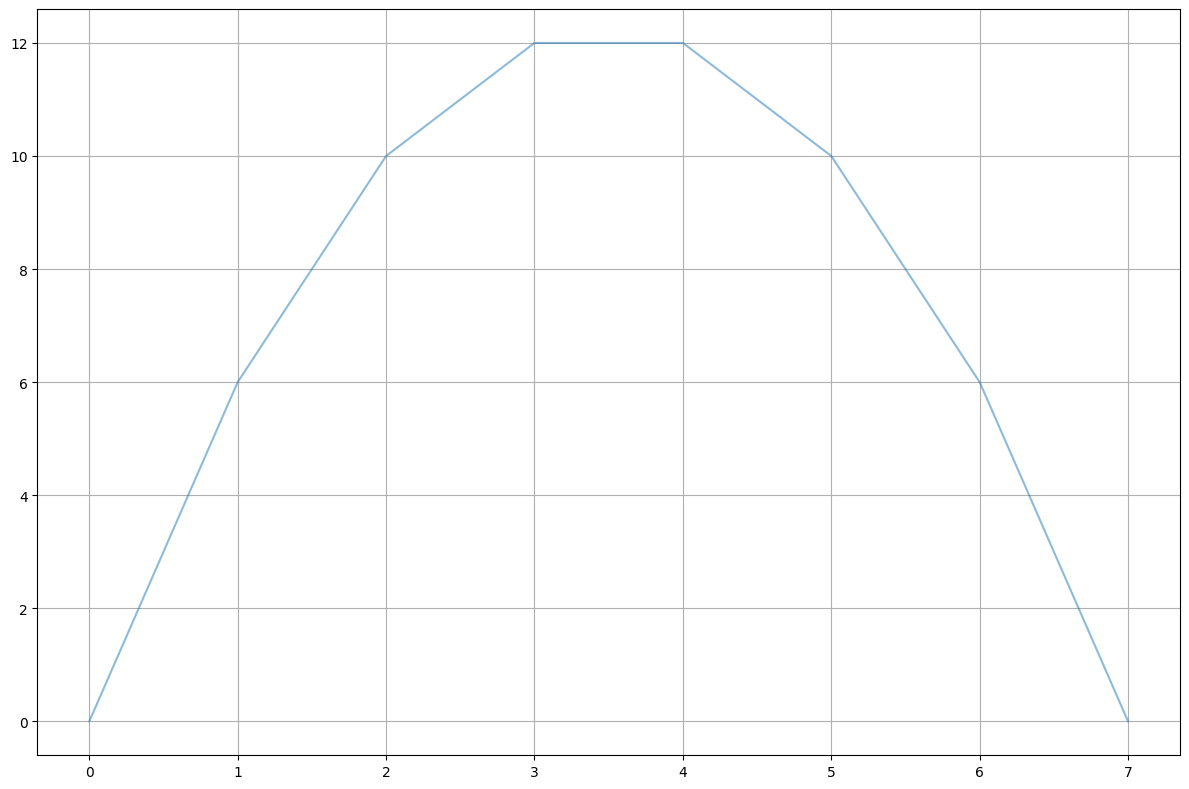

In [10]:
plt.plot(range(8), [compute_distance(7, i) for i in range(8)]);

In [11]:
def compute_possibilities(alloted_time, best_distance):
    possibilities = []
    for i in range(alloted_time + 1):
        distance = compute_distance(alloted_time, i)
        if distance > best_distance:
            possibilities.append((i, distance))

    return possibilities

In [12]:
compute_possibilities(7, 9)

[(2, 10), (3, 12), (4, 12), (5, 10)]

In [13]:
def compute_answer(input):
    parsed_input = parse_input(input)
    return np.prod([len(compute_possibilities(alloted_time, best_distance))\
                    for alloted_time, best_distance in parsed_input])

In [16]:
compute_answer(input_)

771628

# Part 2

In [18]:
def parse_input_2(input):
    time_line, distance_line = input.strip().split("\n")
    return (
        (int(time_line.split(":")[1].replace(" ", "")),
         int(distance_line.split(":")[1].replace(" ", "")))
    )

In [19]:
parse_input_2(input_)

(41777096, 249136211271011)

In [20]:
def compute_possibilities_2(alloted_time, best_distance):
    n_possibilities = 0
    for i in tqdm(range(alloted_time + 1), ncols=80):
        distance = compute_distance(alloted_time, i)
        if distance > best_distance:
            n_possibilities += 1

    return n_possibilities

In [21]:
compute_possibilities_2(*parse_input_2(input_))

100%|██████████████████████████| 41777097/41777097 [00:26<00:00, 1601059.48it/s]


27363861